<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Otimiza%C3%A7%C3%A3o_de_modelos_atrav%C3%A9s_de_hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC


!apt-get install graphviz # Instala o graphviz na linha de comando. 
!pip install graphviz # Instala o graphviz
!pip install seaborn==0.9.0


uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

dados = pd.read_csv(uri)

dados.head()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = {'mileage_per_year': 'milhas_por_ano', 
              'model_year': 'ano_do_modelo',  
              'price': 'preco', 
              'sold': 'vendido'}

dados = dados.rename(columns=a_renomear)

ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

a_trocar = {'yes': 1, 
            'no': 0}

dados.vendido = dados.vendido.map(a_trocar) # Para alterar valores de uma coluna, a chama como variável, 
                                            # depois a chama novamente junto da função map, que irá 
                                            # requerer um argumento do mapeamento dos valores que se deseja alterar. 

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'])
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# Dados de Azar

In [ ]:
# Criando uma situação horrível de azar onde as classes estão ordenadas por padrão. 

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]

dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,16,24812.80412
5322,84843.49,0,17,23095.63834
5319,83100.27,0,23,36240.72746
5316,87932.13,0,20,32249.56426
5315,77937.01,0,19,28414.50704


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 5
np.random.seed(SEED)

modelo = DummyClassifier()
resultado = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = resultado["test_score"].mean()
desvio_padrao = resultado["test_score"].std()
intervalo = (media - (2*desvio_padrao))*100, (media + (2*desvio_padrao))*100

print(" A média de acurácia com validação cruzada é de: %2.f" %(media*100))
print(" A acurácia com validação cruzada referente ao teste é de: [%2.f, %2.f]" % intervalo)


 A média de acurácia com validação cruzada é de: 58
 A acurácia com validação cruzada referente ao teste é de: [58, 58]


In [ ]:
SEED = 5
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=3)
resultado = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = resultado["test_score"].mean()
desvio_padrao = resultado["test_score"].std()
intervalo = (media - (2*desvio_padrao))*100, (media + (2*desvio_padrao))*100

print(" A média de acurácia com validação cruzada é de: %2.f" %(media*100))
print(" A acurácia com validação cruzada referente ao teste é de: [%2.f, %2.f]" % intervalo)


 A média de acurácia com validação cruzada é de: 79
 A acurácia com validação cruzada referente ao teste é de: [76, 82]


Perceba que eu usei o DecisionTreeClassifier também com os valores x e y configurados no aspecto padrão, aqui de azar. Seu uso se dá de maneira complementar ao meu baseline, no sentido em que esse será o maior valor encontrado ou pelo Dummy ou por um outro estimador mais elaborado, como o DecisionTreeClassifier. 

In [ ]:
# Aqui estou gerando números aleatórios e os incrementando com a idade do modelo, 
# como forma de gerar uma nova coluna com valores que serão correspondentes ao modelo
# do carro. 
dados["modelo_do_carro"] = dados.idade_do_modelo + np.random.randint(-2,3)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_do_carro
0,30941.02,1,22,35085.22134,23
1,40557.96,1,24,12622.05362,25
2,89627.50,0,16,11440.79806,17
3,95276.14,0,7,43167.32682,8
4,117384.68,1,8,12770.11290,9


In [ ]:
def imprime_resultados(resultado): 

  media = resultado["test_score"].mean()
  desvio_padrao = resultado["test_score"].std()
  intervalo = (media - (2*desvio_padrao))*100, (media + (2*desvio_padrao))*100

  print(" A média de acurácia com validação cruzada é de: %2.f" %(media*100))
  print(" A acurácia com validação cruzada referente ao teste é de: [%2.f, %2.f]" % intervalo)


In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 5
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=3)

cv = GroupKFold(n_splits=10)

resultado = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo_do_carro, return_train_score=False)

imprime_resultados(resultado)


 A média de acurácia com validação cruzada é de: 79
 A acurácia com validação cruzada referente ao teste é de: [77, 81]


Comparando com os valores x_azar e y_azar e x e y usando como modelo o DecisionTreeClassifier, nota-se a média da acurácia se mantém, enquanto que o intervalo melhora em relação ao valor máximo e piora dois pontos para baixo em relação ao valor mínimo. 

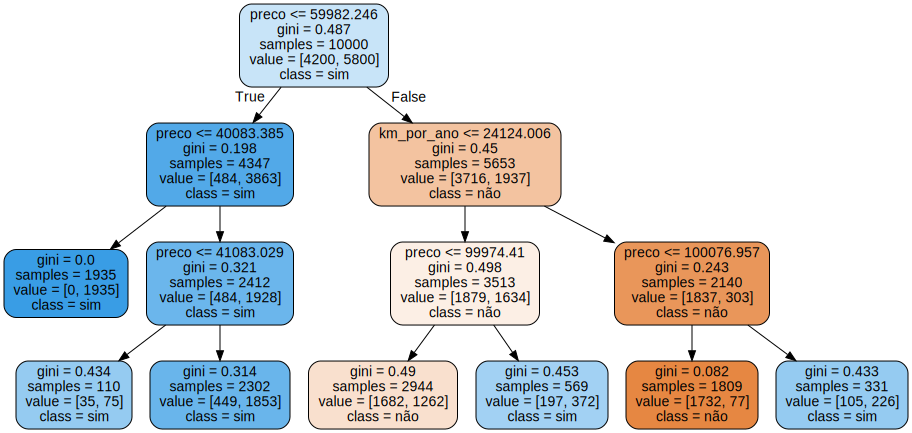

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Devo chamar o modelo mesmo ele tendo sido treinado a quantidade de vezes
# definida pelo cv, pois agora estou pegando aquele modelo de lá para cá, 
# usando um único, o melhor, efetivamente. 
modelo.fit(x_azar, y_azar)

features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

# Em relação ao max_depth do DTC, além de ele influir na acurácia, 
# também influi na profundidade de decisão gerada pela árvore de decisão, 
# que pode ser vista abaixo. 

# Começando a exploração com hiperparâmetros por baixo dos panos. 

In [ ]:
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth):
  SEED = 5
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  resultado = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo_do_carro, return_train_score=True)
  print("A árvore com max_depth = %d, media de treino = %.2f, media de teste = %.2f" % (max_depth, resultado["train_score"].mean()*100, resultado['test_score'].mean() * 100))

  train_score = resultado["train_score"].mean()*100
  test_score = resultado["test_score"].mean()*100
  fit_time = resultado["fit_time"].mean()*100
  score_time = resultado["score_time"].mean()*100

  tabela = [max_depth, train_score, test_score, fit_time, score_time]
  return tabela

# Aqui chamo a variável resultados que irá rodas no ciclo for a primeira
# informação até a 32°. 
resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
# Transformando em dataframe. 
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test", "fit_time", "score_time"])
resultados.head()

A árvore com max_depth = 1, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 2, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 3, media de treino = 78.75, media de teste = 78.69
A árvore com max_depth = 4, media de treino = 78.80, media de teste = 78.62
A árvore com max_depth = 5, media de treino = 78.97, media de teste = 78.62
A árvore com max_depth = 6, media de treino = 79.16, media de teste = 78.30
A árvore com max_depth = 7, media de treino = 79.45, media de teste = 78.04
A árvore com max_depth = 8, media de treino = 79.87, media de teste = 77.86
A árvore com max_depth = 9, media de treino = 80.40, media de teste = 77.39
A árvore com max_depth = 10, media de treino = 81.14, media de teste = 77.21
A árvore com max_depth = 11, media de treino = 81.96, media de teste = 76.93
A árvore com max_depth = 12, media de treino = 82.82, media de teste = 76.59
A árvore com max_depth = 13, media de treino = 83.76, media de teste = 76.31
A árvore

,max_depth,train,test,fit_time,score_time
0,1,75.791151,75.783225,0.698605,0.246079
1,2,75.791151,75.783225,0.985303,0.257828
2,3,78.754536,78.687399,1.152685,0.215440
3,4,78.802318,78.618243,1.375532,0.234013
4,5,78.967999,78.618650,1.600494,0.248184


Contraintuitivamente podetia se pensar que quanto maior a profundidade da árvore de decisão, melhor seria a sua acurácia, mostrada aqui por sua respectiva média. Contudo, nota-se que a média sob até um determinado ponto, mas que descresce posteriormente. Por que isso ocorre? Os valores que estou revelando, analisando, requerendo, em suma, são referentes ao teste, isso é muito importante. Acontece que quanto mais minha árvore treina, sendo esses treinos aprofundados também pela profundidade máxima de minha árvore (max_deph), significa que ela fica muito boa para os treinos e ruim aos testes, como se alguém decorasse algo, mas que ao ver algo novo que escapa do que decorou não soubesse responder com exatidão. É isso que está ocorrendo. 

In [ ]:
# Para ver as informações acima de maneira mais legível:
!pip install seaborn==0.9.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


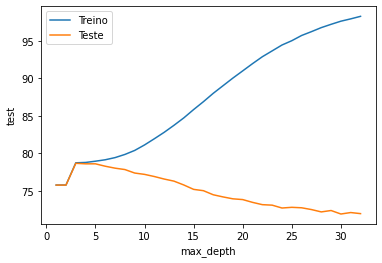

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Criando o gráfico de linha com seaborn. 
# Justapondo ambos, o gráfico retorna no eixo y tanto o valor 
# de treino quanto de teste. 
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)

# Colocando legenda no gráfico. 
plt.legend(["Treino", "Teste"])

In [ ]:
# A análise gráfica, assim como da tabela, permite dizer que 
# o treino e teste são inversamente proporcionais um ao outro, 
# no sentido em que quanto mais o treino tende a ser melhor, 
# pior o teste tendencia a ser. Contudo, ambos encontram um valor
# de equilíbrio, na forma em que nem o treino e nem o teste são
# substancialmente depreciados. 

In [ ]:
# Aqui eu posso ver os melhores valores para o teste. 
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test,fit_time,score_time
2,3,78.754536,78.687399,1.152685,0.215440
4,5,78.967999,78.618650,1.600494,0.248184
3,4,78.802318,78.618243,1.375532,0.234013
5,6,79.160122,78.298396,1.803815,0.260384
6,7,79.448864,78.040026,2.216964,0.283771


# Explorando a combinação de três hiperparâmetros:

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 5
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  resultado = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo_do_carro, return_train_score=True)
  print("A árvore com max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, media de treino = %.2f, media de teste = %.2f" % (max_depth, min_samples_leaf, min_samples_split, resultado["train_score"].mean()*100, resultado['test_score'].mean() * 100))

  train_score = resultado["train_score"].mean()*100
  test_score = resultado["test_score"].mean()*100
  fit_time = resultado["fit_time"].mean()*100
  score_time = resultado["score_time"].mean()*100

  tabela = [max_depth, min_samples_leaf, min_samples_split,train_score, test_score, fit_time, score_time]
  return tabela
  # Aqui chamo a variável resultados que irá rodas no ciclo for a primeira
  # informação até a 32°. 

def busca():
  resultados = []
  # Criando dois ciclos for para o max_depth e min_samples_leaf.
  # Eles começam a partir do 1 e vão até o 32, respectivamente
  for max_depth in range(1,33): 
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]: 
        # Crio a variável tabela, que instancia a função roda_arvore_de_decisao 
        # os valores dos hiperparâmetros gerados pelos ciclos for. 
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        # Adiciono a tabela aos resultados
        resultados.append(tabela)
  # Resultados recebidos são transformados em dataframe. 
  resultados = pd.DataFrame(resultados, columns = ["max_depth","min_samples_leaf", "min_samples_split", "train", "test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()


A árvore com max_depth = 1, min_samples_leaf = 32, min_samples_split = 32, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 1, min_samples_leaf = 32, min_samples_split = 64, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 1, min_samples_leaf = 32, min_samples_split = 128, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 1, min_samples_leaf = 32, min_samples_split = 256, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 1, min_samples_leaf = 64, min_samples_split = 32, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 1, min_samples_leaf = 64, min_samples_split = 64, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 1, min_samples_leaf = 64, min_samples_split = 128, media de treino = 75.79, media de teste = 75.78
A árvore com max_depth = 1, min_samples_leaf = 64, min_samples_split = 256, media de treino = 75.79, media de teste = 75.78
A árvore com

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791151,75.783225,2.140152,0.632284
1,1,32,64,75.791151,75.783225,1.523888,0.503736
2,1,32,128,75.791151,75.783225,0.953522,0.316451
3,1,32,256,75.791151,75.783225,0.665190,0.199132
4,1,64,32,75.791151,75.783225,0.647144,0.213516


Perceba que aqui há tanto o tempo do treino quanto do teste. Isso é importante para sabermos a melhor combinação dos hiperparâmetros ao custo de menor tempo possível. 

In [ ]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
53,4,64,64,78.751201,78.697359,2.301517,0.364087
54,4,64,128,78.751201,78.697359,2.131650,0.345664
52,4,64,32,78.751201,78.697359,2.475317,0.632293
47,3,256,256,78.751201,78.697359,1.811051,0.376799
46,3,256,128,78.751201,78.697359,2.015247,0.408473


In [ ]:
corr = resultados.corr()

In [ ]:
# Indica a correlação das variáveis. 

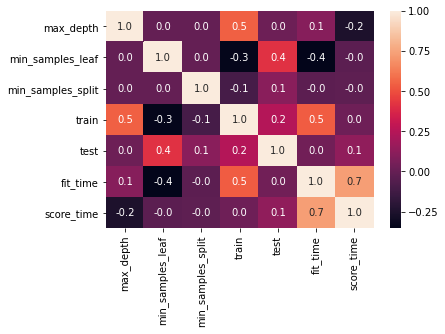

In [ ]:
sns.heatmap(corr, annot=True, fmt=".1f")

In [ ]:
# Contudo já existe uma biblioteca que faz a busca de 
# hiperparâmetros com validação cruzada, o  GridSearchCV. 

from sklearn.model_selection import GridSearchCV

SEED=5
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

# Grid requere para seu funcionamento o estimador, 
# a definição dos hiperparâmetros, que aqui defini
# através do dicionário acima, e depois a separação
# e o tipo de separação, passando o cv. 
busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar,groups = dados.modelo_do_carro)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

# O dataframe abaixo irá mostrar uma tabela semelhante a que
# estava usando, mostrando as combinações dos hiperparâmetros, 
# o valor do treino e teste, bem como os respectivos tempos. 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015391,0.004278,0.003825,0.002536,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78635,0.80632,0.787849,0.76828,0.796185,0.79065,0.77988,0.794209,0.778316,0.781697,0.786974,0.010143,1
1,0.012038,0.000865,0.002655,0.000305,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78635,0.80632,0.787849,0.76828,0.796185,0.79065,0.77988,0.794209,0.778316,0.781697,0.786974,0.010143,1
2,0.011907,0.000419,0.002487,0.000090,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78635,0.80632,0.787849,0.76828,0.796185,0.79065,0.77988,0.794209,0.778316,0.781697,0.786974,0.010143,1
3,0.013138,0.001843,0.002884,0.000560,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78635,0.80632,0.787849,0.76828,0.796185,0.79065,0.77988,0.794209,0.778316,0.781697,0.786974,0.010143,1
4,0.012229,0.001434,0.002523,0.000143,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78635,0.80632,0.787849,0.76828,0.796185,0.79065,0.77988,0.794209,0.778316,0.781697,0.786974,0.010143,1


In [ ]:
# Eu ainda posso ver a melhor pontuação e e os melhores parâmetros. 
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.69735915931162


In [ ]:
# Se eu quiser o melhor estimador, que me mostra a melhor 
# combinação dos hiperparâmetros.
print(busca.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


In [ ]:
# Evitar essa abordagem, pois está sendo muito otimista. 
melhor = busca.best_estimator_
previsao = melhor.predict(x_azar)
acuracia = accuracy_score(y_azar, previsao)*100

print("A acurácia foi de %.2f" % acuracia, "%")


A acurácia foi de 78.75 %


A célula acima mostra uma acurácia muito otimista e que, portanto, devemos evitar essa abordagem. Quando se usa validação cruzada, assim como a exploração de hiperparâmetros, para sabermos a taxa de acerto precisamos executar mais uma validação cruzada, e isso se chama Nested cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv= GroupKFold(n_splits=10), groups=dados.modelo_do_carro)

# O código não funciona com o GroupsKFold, pois há um bug que o impede. 
# Para funcionar eu deveria fazer com um KFold que não demanda grupos, como 
# um KFold normal por exemplo. 

[nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/